In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['clubs', 'diamonds', 'hearts', 'spades']

In [3]:
def process_features(feature_list):
    samples = []
    labels = []
    for i, feature_folder in enumerate(feature_list):
        image_names = next(os.walk(feature_folder))[2]
        images = [cv2.imread(os.path.join(feature_folder, image_name), cv2.IMREAD_GRAYSCALE) for image_name in image_names]
        samples += images
        labels += [i] * len(images)
    return np.array(samples), np.array(labels)

In [4]:
rank_samples, rank_labels = process_features(ranks)

In [5]:
print(rank_samples.shape)
print(rank_labels.shape)

(4160, 720, 960)
(4160,)


0
2


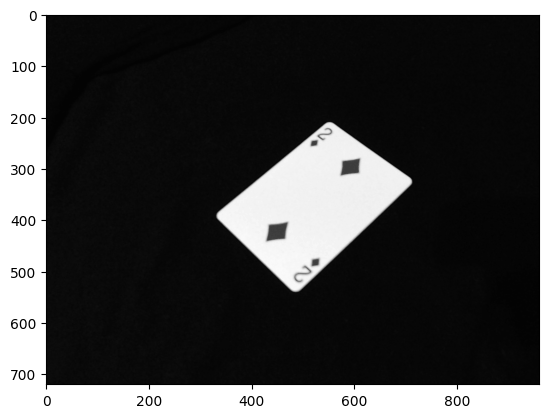

In [6]:
plt.imshow(rank_samples[0], cmap='gray')
print(rank_labels[0])
print(ranks[rank_labels[0]])

In [7]:
suit_samples, suit_labels = process_features(suits)

In [8]:
print(suit_samples.shape)
print(suit_labels.shape)

(1280, 720, 960)
(1280,)


0
clubs


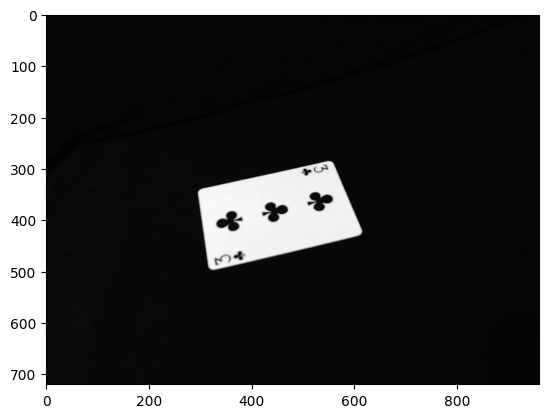

In [9]:
plt.imshow(suit_samples[0], cmap='gray')
print(suit_labels[0])
print(suits[suit_labels[0]])

In [10]:
np.save('rank_samples.npy', rank_samples)

In [11]:
np.save('rank_labels.npy', rank_labels)

In [12]:
np.save('suit_samples.npy', suit_samples)

In [13]:
np.save('suit_labels.npy', suit_labels)